In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, romberg, fixed_quad
from matplotlib import rcParams
rcParams['text.usetex']=True
rcParams['font.family']='serif' #'sans-serif'

In [2]:
# Constantes Universales
G = 6.674e-20 #km³/kg*s²
c = 299792.458 #km/s
Msol = 1.98847e30 #kg
Masas_solares = G*Msol/c**2 #en unidades geométricas (km)
print('Masas solares de la estrella:', Masas_solares)

# Datos iniciales de la estrella
M = 2.03 * Masas_solares
R = 7.5 #km
Umax = M/R

N=1000

# Parámetro de compacidad
print('R= ',R/M,' M')
if R/M>3:
    print('Estrella OK')
else:
    print('La estrella es ultracompacta')
    
def xcrit(M,R):
    U=M/R
    return 3*U*np.sqrt(3*(1-2.*U))

def delta(x):
    return np.arcsin(x)/np.pi

xc = xcrit(M,R)
delta_c = delta(xc)*np.pi
print(delta(xc),'pi')
print(delta_c)

1.4766033168957307
R=  2.5020811199011197  M
La estrella es ultracompacta
0.38044182905227697 pi
1.1951932552688973


In [3]:
def f(r,R,M,delta):
    x=np.sin(delta)
    v = r**2/x
    w = (1-2.*M/R)/R**2-(1.-2.*M/r)*x**2/r**2
    return v*np.sqrt(w)

def RK4(f,a,b,N,R,M,delta):
    h = (b-a)/float(N)
    lista_phi=np.arange(a,b,h)
    r=R
    for phi in lista_phi:
        lista_r.append(r)
        k1=h*f(r,R,M,delta)
        k2=h*f(r+0.5*k1,R,M,delta)
        k3=h*f(r+0.5*k2,R,M,delta)
        k4=h*f(r+k3,R,M,delta)
        r+=(k1+2*k2+2*k3+k4)/6.
    return lista_r,lista_phi

def RK4mod(f,a,b,N,R,M,delta):
    rfot = 3*M
    h = (b-a)/float(N)
    lista_phi=np.arange(a,b,h)
    r=R
    for phi in lista_phi:
        lista_r.append(r)
        k1=h*f(r,R,M,delta)
        k2=h*f(r+0.5*k1,R,M,delta)
        k3=h*f(r+0.5*k2,R,M,delta)
        k4=h*f(r+k3,R,M,delta)
        r+=(k1+2*k2+2*k3+k4)/6.
        if r>=rfot: 
            r=rfot
            lista_phi=lista_phi[0:len(lista_r)]
            break
        else: continue
    return lista_r,lista_phi


lista_r=[]
r1,phi1 = RK4(f,0,1.5,N,R,M,0.3*np.pi)#ok

lista_r=[]
r2,phi2 = RK4(f,0,10,N,R,M,0.38044182905227697*np.pi)#ok

lista_r=[]
r3,phi3 = RK4mod(f,0*np.pi,2.364,N,R,M,0.3815*np.pi)#OK

lista_r=[]
rr,phir = RK4(f,0*np.pi,0.14,N,R,M,0.045*np.pi)#ok

lista_r=[]
rrr,phirr = RK4(f,0*np.pi,0.3,N,R,M,0.09*np.pi)#ok

lista_r=[]
rt,phit = RK4mod(f,0*np.pi,1.57,N,R,M,0.387*np.pi)#OK

lista_r=[]
r5,phi5 = RK4mod(f,0*np.pi,0.78,N,R,M,0.41*np.pi)#ok

dphi3 = phi3[1]-phi3[0]
phi4, r4 = np.zeros(N), np.zeros(N)
phi4[0] = phi3[-1]
r4[0] = r3[-1]
for i in range(1,len(r3)):
    phi4[i] = phi4[i-1] + dphi3
    r4[i] = r3[-i-1]

phi4=phi4[0:len(r3)]
r4 = r4[0:len(r3)]

dphi5 = phi5[1]-phi5[0]
phi6, r6 = np.zeros(N), np.zeros(N)
phi6[0] = phi5[-1]
r6[0] = r5[-1]
for i in range(1,len(r5)):
    phi6[i] = phi6[i-1] + dphi5
    r6[i] = r5[-i-1]

phi6=phi6[0:len(r5)]
r6 = r6[0:len(r5)]

dphit = phit[1]-phit[0]
phitt, rtt = np.zeros(N), np.zeros(N)
phitt[0] = phit[-1]
rtt[0] = rt[-1]
for i in range(1,len(rt)):
    phitt[i] = phitt[i-1] + dphit
    rtt[i] = rt[-i-1]

phitt=phitt[0:len(rt)]
rtt = rtt[0:len(rt)]

In [4]:
#print(r3)

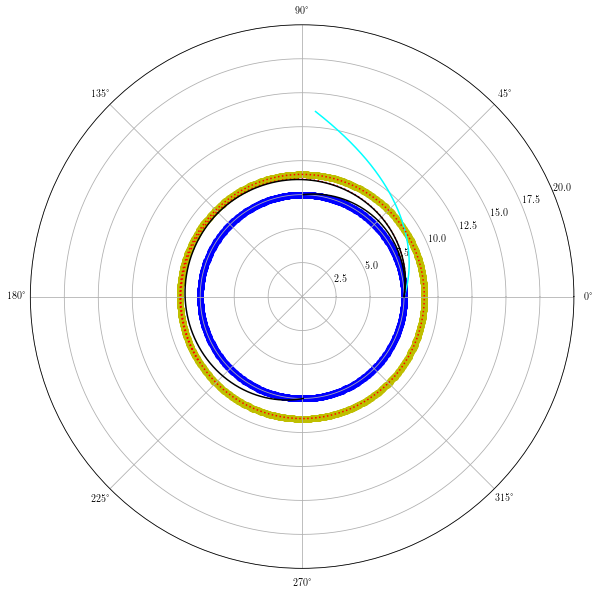

In [5]:
phis=np.arange(0,2*np.pi,0.01)
rest =R*np.ones(len(phis))
rfot = 3.*M*np.ones(len(phis))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.scatter(phis,rest, c='b',ls='-' )
ax.scatter(phis,rfot,c='y',ls='-')
c1 = ax.plot(phi1,r1,c='cyan')
c2 = ax.plot(phi2,r2,c='red',ls=':')
c3 = ax.plot(phi3,r3,c='black')
c4 = ax.plot(phi4,r4,c='black')
c5 = ax.plot(phi5,r5,c='black')
c6 = ax.plot(phi6,r6,c='black')
ax.set_rmin(0)
#ax.set_rmax(max(r5))
ax.set_rmax(20)
#ax.set_thetamin(0)
#ax.set_thetamax(360)
plt.show()

<IPython.core.display.Javascript object>


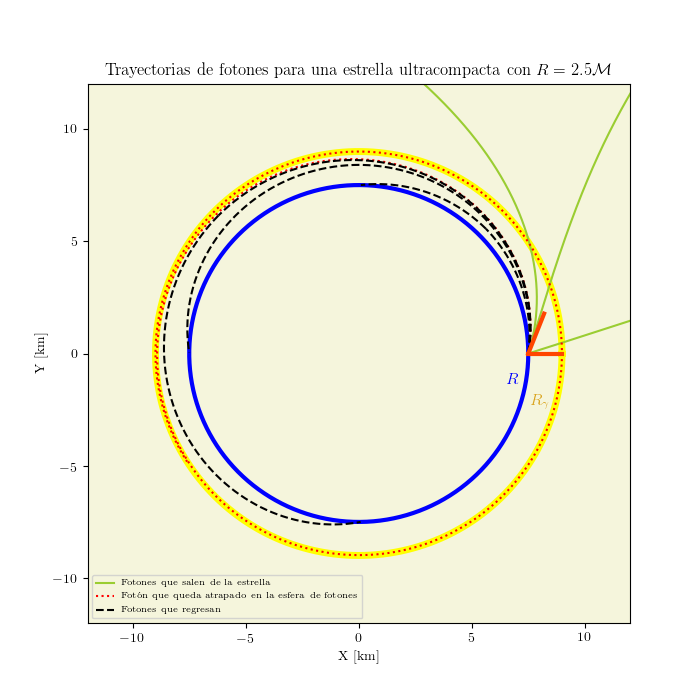

In [6]:
%matplotlib notebook

def cartesianas(r,phi):
    x,y = r*np.cos(phi),r*np.sin(phi)
    return x,y

x0 = [R,3*M]
y0 = [0,0]
x1 = np.linspace(R,R+0.7,100)
plt.figure(figsize=(7,7))
plt.rcParams['axes.facecolor'] = 'beige'
plt.plot(cartesianas(rest,phis)[0],cartesianas(rest,phis)[1],linewidth=3,color="blue")
plt.plot(cartesianas(rfot,phis)[0],cartesianas(rfot,phis)[1],linewidth=5,color="yellow")
plt.plot(cartesianas(r1,phi1)[0],cartesianas(r1,phi1)[1],color="yellowgreen",label="Fotones que salen de la estrella")
plt.plot(cartesianas(rr,phir)[0],cartesianas(rr,phir)[1],color="yellowgreen")
plt.plot(cartesianas(rrr,phirr)[0],cartesianas(r1,phi1)[1],color="yellowgreen")
plt.plot(cartesianas(r2,phi2)[0],cartesianas(r2,phi2)[1],color="red",linestyle="dotted",label="Fotón que queda atrapado en la esfera de fotones")
plt.plot(cartesianas(r3,phi3)[0],cartesianas(r3,phi3)[1],'k--',label="Fotones que regresan")
plt.plot(cartesianas(r4,phi4)[0],cartesianas(r4,phi4)[1],'k--')
plt.plot(cartesianas(r5,phi5)[0],cartesianas(r5,phi5)[1],'--',color="black")
plt.plot(cartesianas(r6,phi6)[0],cartesianas(r6,phi6)[1],'--',color="black")
plt.plot(cartesianas(rt,phit)[0],cartesianas(rt,phit)[1],'--',color="black")
plt.plot(cartesianas(rtt,phitt)[0],cartesianas(rtt,phitt)[1],'--',color="black")
plt.plot(x0,y0,color="orangered",linestyle="-",linewidth=3)
plt.plot(x1,np.tan(1.1951932552688973)*np.ones(len(x1))*(x1-np.ones(len(x1))*R),color="orangered",linestyle="-",linewidth=3)
plt.legend(loc=3, prop={'size': 6.5})
plt.title(r"Trayectorias de fotones para una estrella ultracompacta con $R=1.25R_s$")
plt.text(R-1, -1.5, '$R$',
        verticalalignment='bottom', horizontalalignment='left',
        color='blue', fontsize=12)
plt.text(3*M-1.4, -2.5, r'$R_{\gamma}$',
        verticalalignment='bottom', horizontalalignment='left',
        color='goldenrod', fontsize=12)
plt.xlim(-12,12)
plt.ylim(-12,12)
#plt.xlim(R-0.1,R+0.5)
#plt.ylim(-0.5,1)
plt.xlabel(r"X [km]")
plt.ylabel(r"Y [km]")
plt.savefig("OrbitasUC.pdf")
plt.show()